<a href="https://colab.research.google.com/github/ash200309/Global-Terrorism/blob/main/Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Global Terrorism EDA**

## Notebook by [Ansh Arora](https://www.linkedin.com/in/ansh-arora-1648a4226/)

**Data description**

Information on more than 180,000 Terrorist Attacks
The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

In [ ]:
import matplotlib.pyplot as plt
import zipfile
import pandas as pd
import plotly.graph_objects as go
from wordcloud import WordCloud
import seaborn as sns

In [ ]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Idk/Global Terrorism - START data.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
df=pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')
df.shape

<ipython-input-275-4333d6e7c76b>:1: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



(181691, 135)

##### 135 columns and 181691 rows! This is a huge dataset!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [ ]:
df.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

##### There are columns with a lot of nulls, these are trash columns. Hence we will drop them.

In [ ]:
# Dropping columns having more than 20K nulls
columns_to_drop = df.columns[df.isnull().sum() > 20000]
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.shape
# 94 unnecessary columns were dropped.

(181691, 45)

In [ ]:
# Removing rest of the nulls
df.dropna(inplace=True)

In [ ]:
df.shape

(149355, 45)

In [ ]:
df.isnull().sum()

eventid             0
iyear               0
imonth              0
iday                0
extended            0
country             0
country_txt         0
region              0
region_txt          0
provstate           0
city                0
latitude            0
longitude           0
specificity         0
vicinity            0
crit1               0
crit2               0
crit3               0
doubtterr           0
multiple            0
success             0
suicide             0
attacktype1         0
attacktype1_txt     0
targtype1           0
targtype1_txt       0
targsubtype1        0
targsubtype1_txt    0
target1             0
natlty1             0
natlty1_txt         0
gname               0
guncertain1         0
individual          0
weaptype1           0
weaptype1_txt       0
nkill               0
nwound              0
property            0
ishostkid           0
dbsource            0
INT_LOG             0
INT_IDEO            0
INT_MISC            0
INT_ANY             0
dtype: int

Unique values in each column

In [ ]:
df.nunique().sort_values()

INT_MISC                 2
crit2                    2
crit1                    2
extended                 2
multiple                 2
individual               2
guncertain1              2
success                  2
crit3                    2
suicide                  2
vicinity                 3
INT_ANY                  3
property                 3
ishostkid                3
INT_LOG                  3
INT_IDEO                 3
doubtterr                3
specificity              4
attacktype1_txt          9
attacktype1              9
region                  12
weaptype1_txt           12
weaptype1               12
region_txt              12
imonth                  13
targtype1_txt           21
targtype1               21
dbsource                25
iday                    32
iyear                   47
targsubtype1           112
targsubtype1_txt       112
nkill                  178
country                202
country_txt            202
natlty1                212
natlty1_txt            212
n

#### No. of Cases over the years

In [ ]:
categories = df['iyear'].value_counts().index
values = df['iyear'].value_counts().values

color_palette = 'reds'
fig = go.Figure(data=[
    go.Bar(x=categories, y=values, marker_color=values, marker=dict(colorscale=color_palette))
])

fig.update_layout(
    title='Cases over the years',
    xaxis_title='Year',
    yaxis_title='Cases Count'
)
fig.show()

#### No. of Cases in each month

In [ ]:
labels = ['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']
values = df['imonth'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.update_layout(
    title='No. of cases each month'
)
fig.show()

#### Attack type vs region

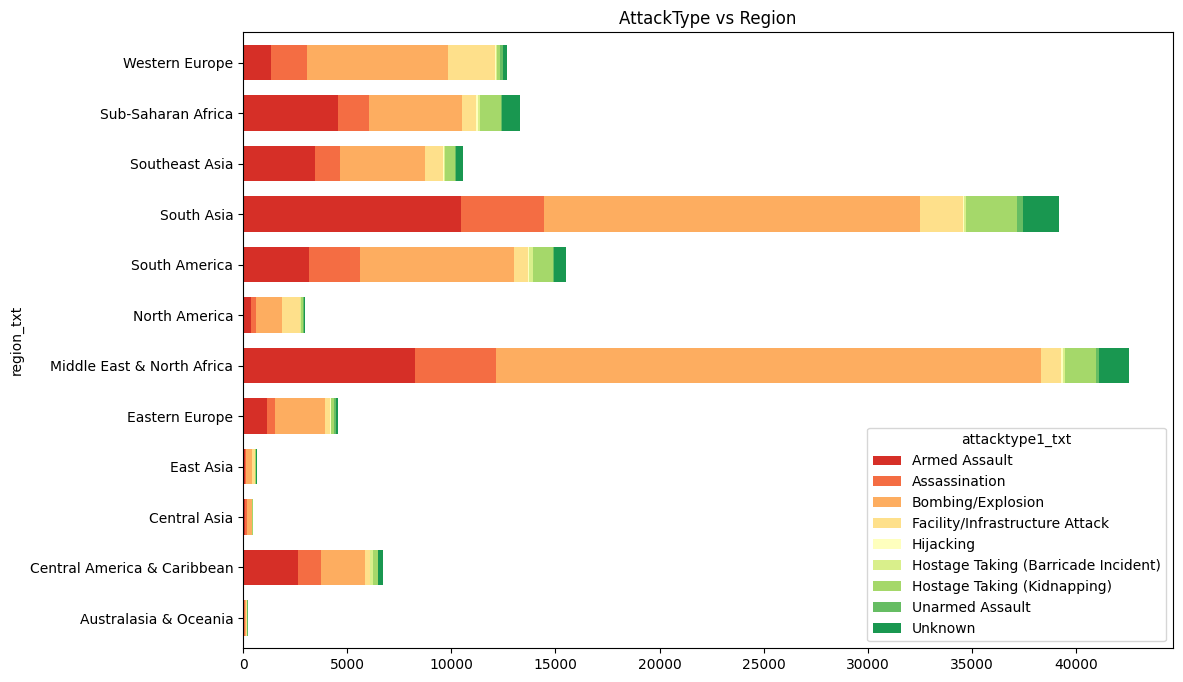

In [ ]:
pd.crosstab(df.region_txt,df.attacktype1_txt).plot.barh(stacked=True,width=0.7,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.title("AttackType vs Region")
plt.show()

#### No. of people killed by each attack type

In [ ]:
categories = df.groupby('attacktype1_txt')['nkill'].sum().index
values = df.groupby('attacktype1_txt')['nkill'].sum().values
color_palette = 'reds'
fig = go.Figure(data=[
    go.Bar(x=categories, y=values, marker_color=values, marker=dict(colorscale=color_palette))
])
fig.update_layout(
    title='No. of people killed by each attack type',
    xaxis_title='attack type',
    yaxis_title='Cases Count'
)
fig.show()

**Insight:** Most poeople die from bombings and Armed assault.

#### No. of Attack vs no. of people killed

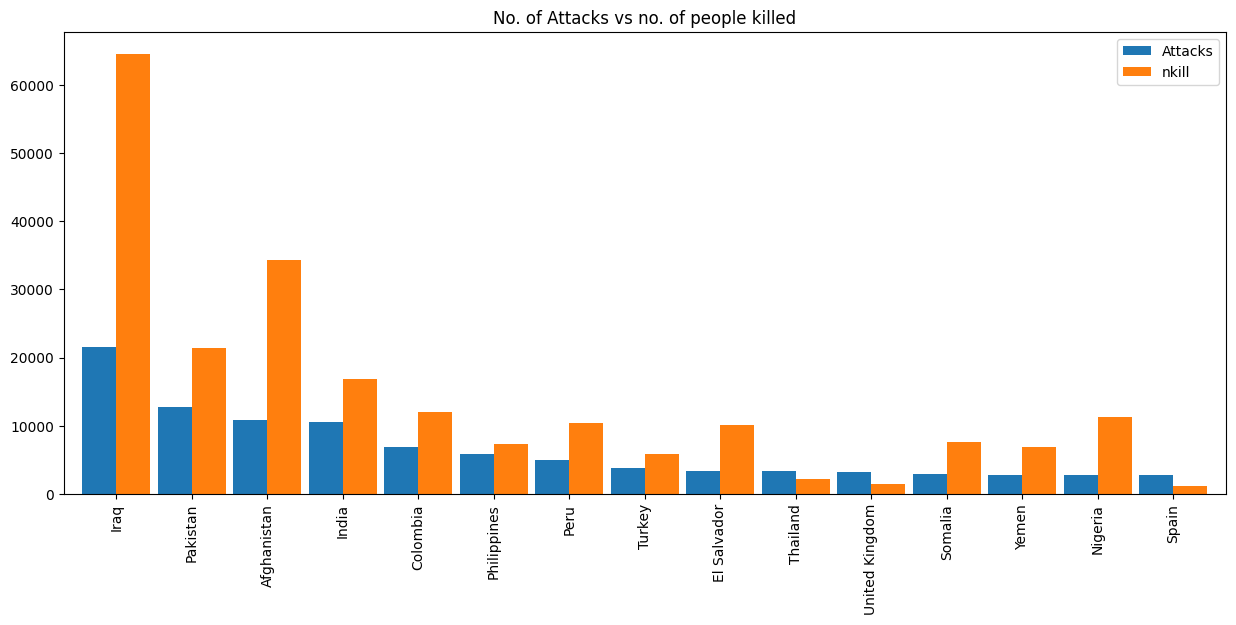

In [ ]:
coun_terror=df['country_txt'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=df.groupby('country_txt')['nkill'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(15,6)
plt.title("No. of Attacks vs no. of people killed")
plt.show()

#### Most affected Countries from terrorism

In [ ]:
categories = df['country_txt'].value_counts().index[0:30]
values = df['country_txt'].value_counts().values[0:30]
color_palette = 'reds'
fig = go.Figure(data=[
    go.Bar(x=categories, y=values, marker_color=values, marker=dict(colorscale=color_palette))
])
fig.update_layout(
    title='Most affected Countries from terrorism',
    xaxis_title='Country name',
    yaxis_title='Cases Count'
)
fig.show()

**Insight**: Iraq, Pakistan, Afganistan and India are the top affected countries.

#### Most Violent Regions

In [ ]:
categories = df['region_txt'].value_counts().index
values = df['region_txt'].value_counts().values
color_palette = 'reds'
fig = go.Figure(data=[
    go.Bar(x=categories, y=values, marker_color=values, marker=dict(colorscale=color_palette))
])
fig.update_layout(
    title='Region with most Terrorism cases',
    xaxis_title='Region Name',
    yaxis_title='Cases Count'
)
fig.show()

**Insight**: Middle East and North Africa are the most terrorism prone regions followed by South Asia. The Australian Region have experienced very few terrorist events. Collectively we can say that The African and Asian Continent experience the highest terrorist attacks.

#### Provinces with most Terrorism Cases

In [ ]:
categories = df['provstate'].value_counts().index[0:30]
values = df['provstate'].value_counts().values[0:30]
color_palette = 'reds'
fig = go.Figure(data=[
    go.Bar(x=categories, y=values, marker_color=values, marker=dict(colorscale=color_palette))
])
fig.update_layout(
    title='Provinces with most Terrorism cases',
    xaxis_title='Province Name',
    yaxis_title='Cases Count'
)
fig.show()

Insight: Bhagdad is the most Violent State

In [ ]:
binary_columns = df.columns[df.nunique() == 2]

#### Plotting all binary columns at once

In [ ]:
for column in binary_columns:
  categories = df[column].value_counts().index
  values = df[column].value_counts().values
  color_palette = 'reds'
  fig = go.Figure(data=[
      go.Bar(x=categories, y=values, marker_color=values, marker=dict(colorscale=color_palette))
  ])
  fig.update_layout(
    title=column,
    height=400, width=600
)
  fig.show()

#### Some insights from above graphs:
- Most of the cases had a 88% success rate.
- Almost every crime is commited by more than one individual.
- 8% crimes included Guns.
- 4% crimes were suicides

## Generating Word Clouds

In [ ]:
wc = WordCloud(width=800, height=400, background_color='white',colormap='inferno')

#### Target types Word Cloud

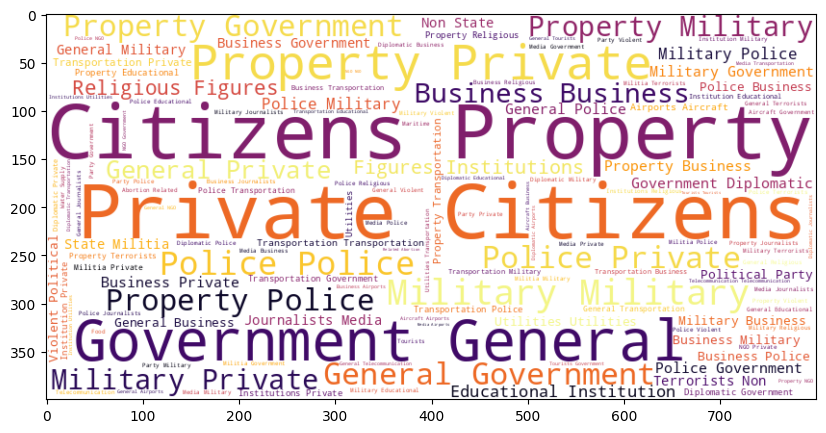

In [ ]:
text=" ".join(df['targtype1_txt'])
wordcloud=wc.generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

#### Nationality Word Cloud

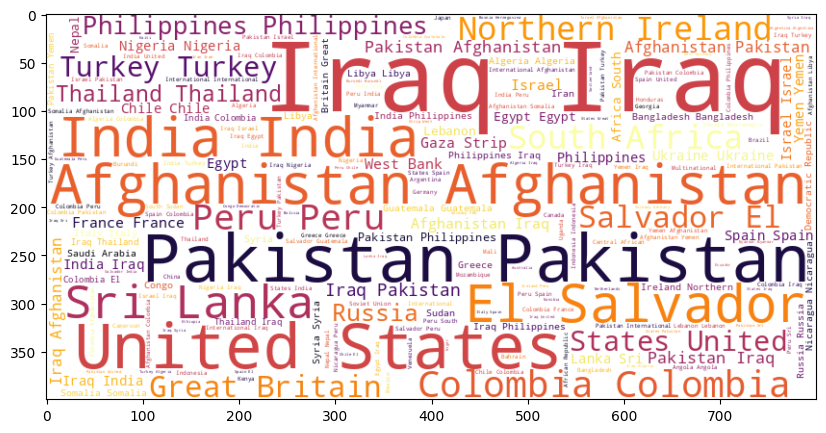

In [ ]:
text=" ".join(df['natlty1_txt'])
wordcloud=wc.generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

#### City names Word Cloud

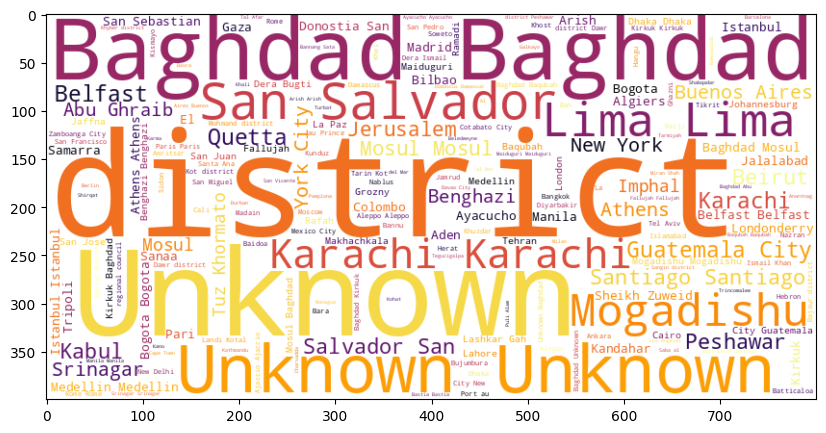

In [ ]:
text=" ".join(df['city'])
wordcloud=wc.generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()